In [1]:
import pandas as pd 
import numpy as np 
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
#import scikitplot as skl
from patsy import dmatrices
sns.set()

In [2]:
data = sm.datasets.fair.load_pandas().data

In [3]:
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [4]:
data.tail()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.0
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.0
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.0
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.0
6365,4.0,22.0,2.5,0.0,2.0,16.0,2.0,4.0,0.0


In [5]:
data['affair'] = (data.affairs >0).astype(int)

In [6]:
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + religious + educ + C(occupation) + C(occupation_husb)', data, return_type="dataframe")

In [7]:
X = X.rename(columns =
{'C(occupation)[T.2.0]':'occ_2',

'C(occupation)[T.3.0]':'occ_3',
'C(occupation)[T.4.0]':'occ_4',
'C(occupation)[T.5.0]':'occ_5',
'C(occupation)[T.6.0]':'occ_6',
'C(occupation_husb)[T.2.0]':'occ_husb_2',
'C(occupation_husb)[T.3.0]':'occ_husb_3',
'C(occupation_husb)[T.4.0]':'occ_husb_4',
'C(occupation_husb)[T.5.0]':'occ_husb_5',
'C(occupation_husb)[T.6.0]':'occ_husb_6'})

In [8]:
y = np.ravel(y)

In [9]:
data.shape

(6366, 10)

In [10]:
data.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374,0.322495
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374,0.467468
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848,1.000000
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991,1.000000


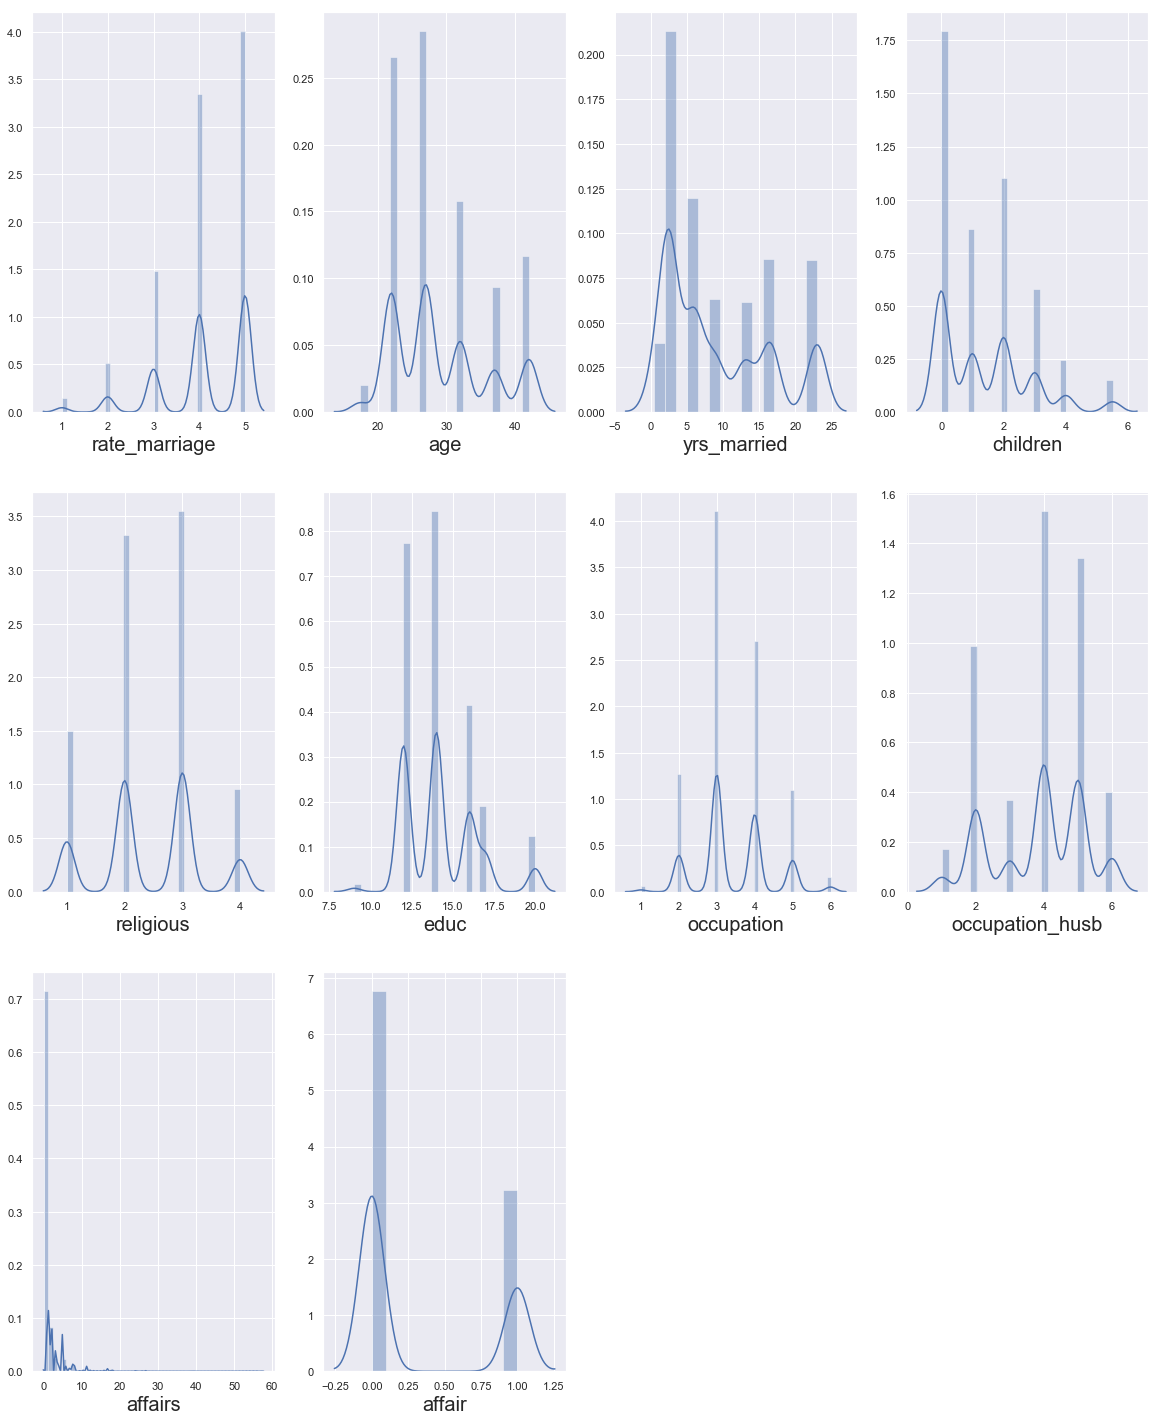

In [11]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=10 :     # as there are 10 columns in the data
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

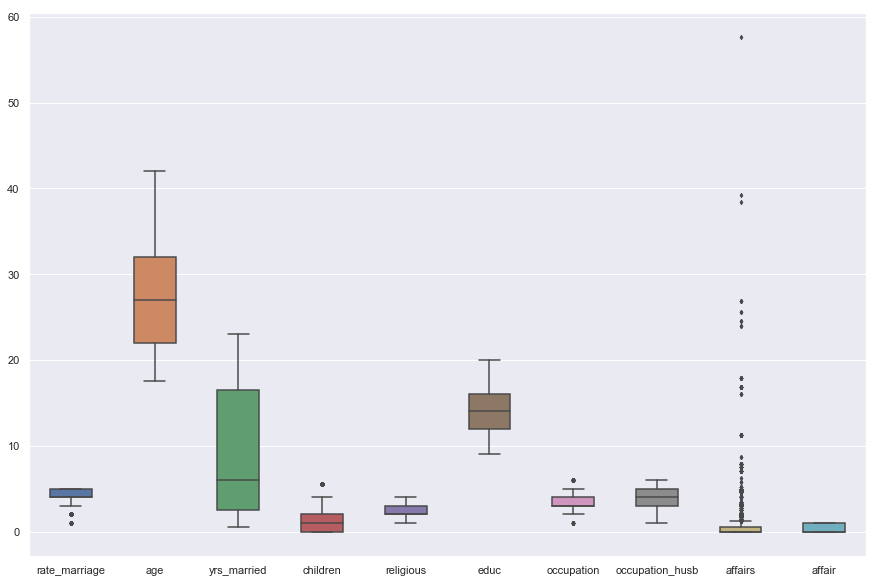

In [12]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width= 0.5,ax=ax,  fliersize=3)
plt.show()

In [13]:
X = data.drop(columns = ['affair'])
y = data['affair']

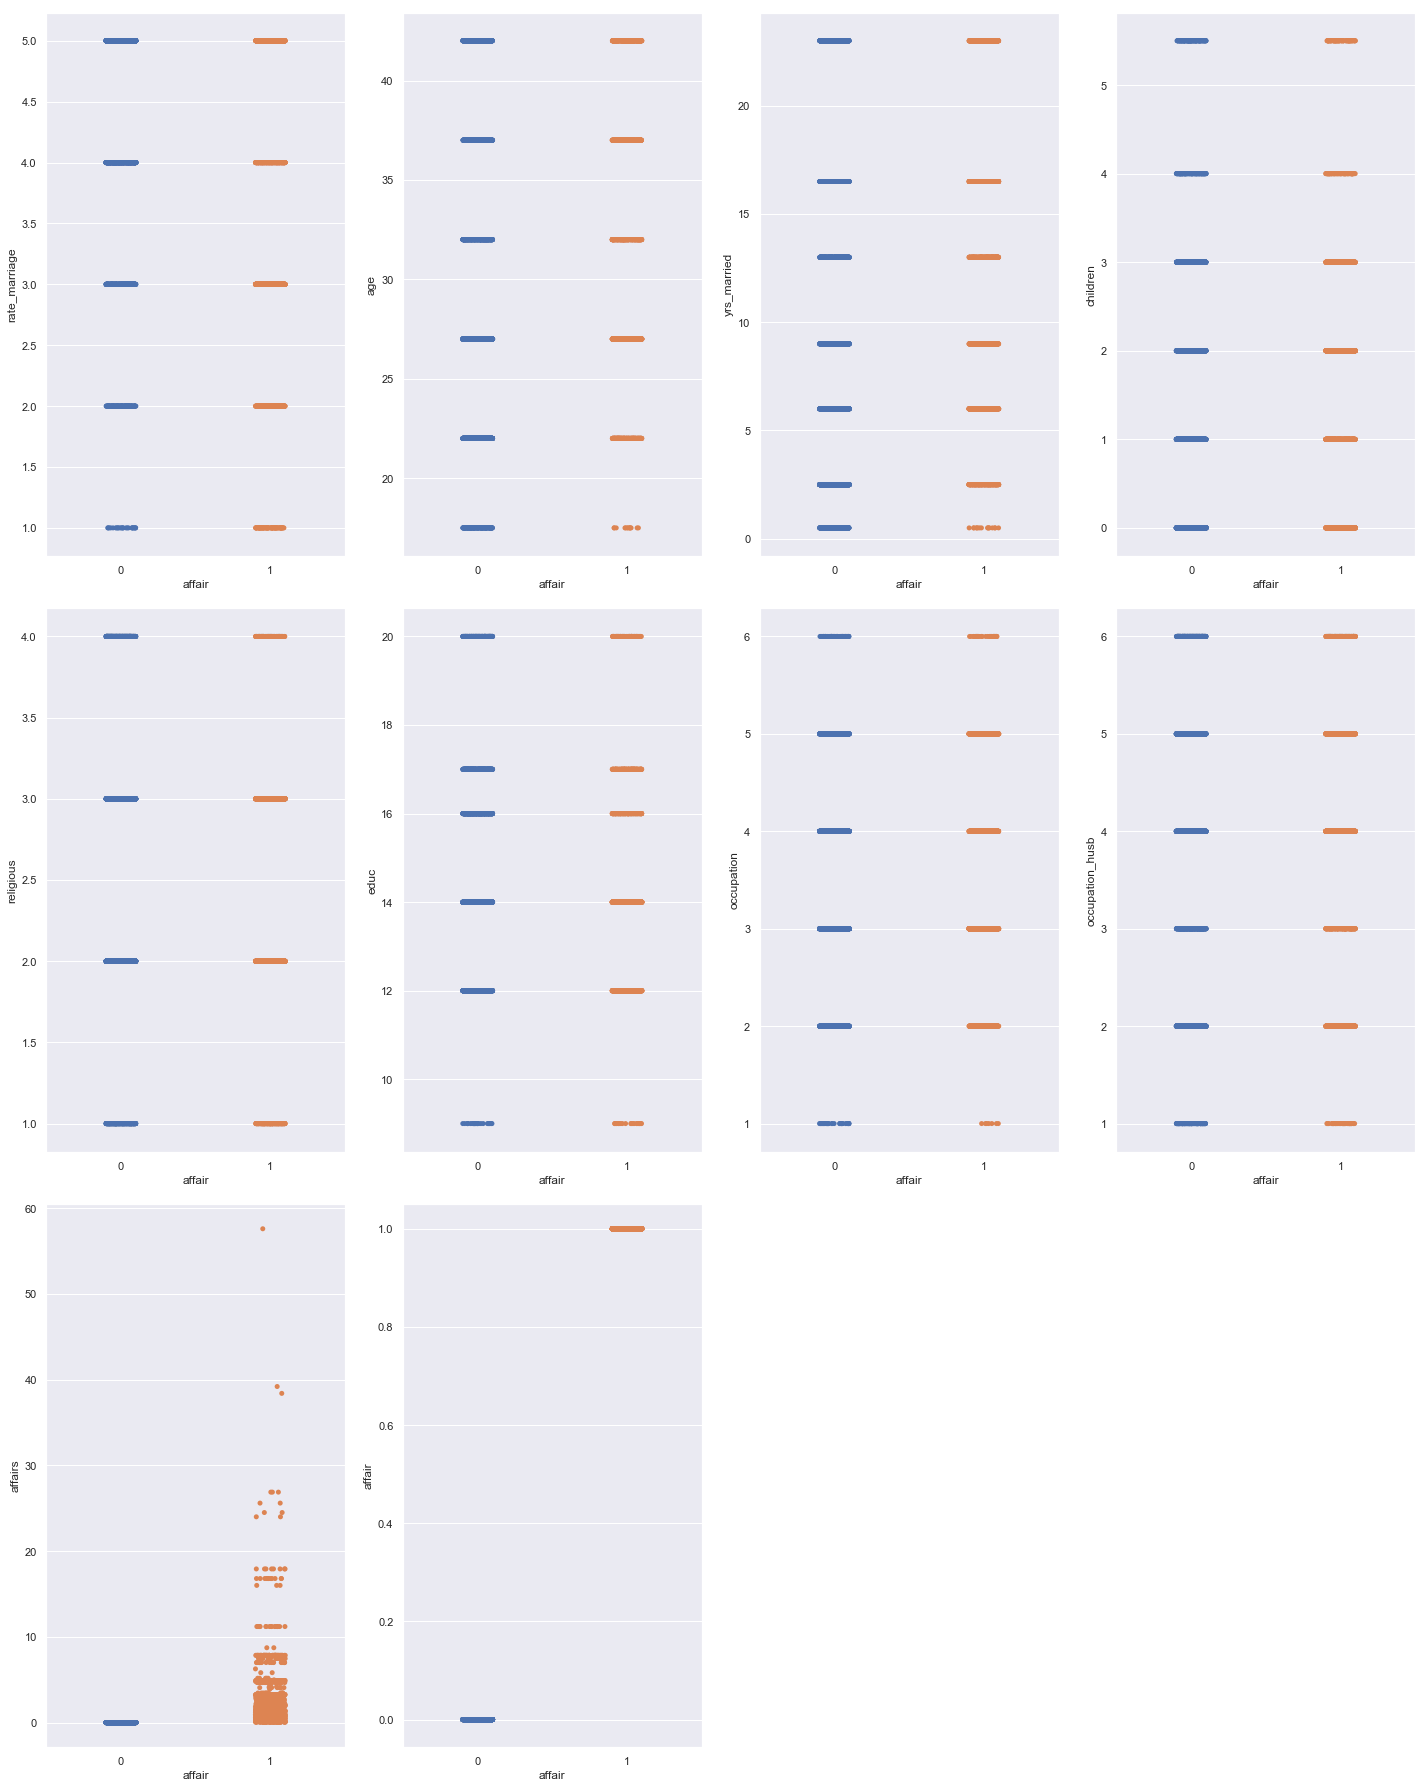

In [14]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=10 :
        ax = plt.subplot(3,4,plotnumber)
        sns.stripplot(y,data[column])
    plotnumber+=1
plt.tight_layout()
plt.show()

In [15]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [16]:
X_scaled

array([[-1.15425213e+00,  4.26024735e-01, -1.29473293e-03, ...,
        -1.51129246e+00,  8.54069123e-01, -2.69727036e-01],
       [-1.15425213e+00, -3.04185400e-01,  5.48189921e-01, ...,
        -4.50087100e-01,  1.11309009e-01,  1.14623935e+00],
       [-1.14052659e-01, -1.03439554e+00, -8.94207296e-01, ...,
        -4.50087100e-01,  8.54069123e-01,  3.15280273e-01],
       ...,
       [ 9.26146808e-01, -1.03439554e+00, -8.94207296e-01, ...,
        -4.50087100e-01, -2.11697133e+00, -3.20158710e-01],
       [ 9.26146808e-01,  4.26024735e-01, -4.13408224e-01, ...,
        -4.50087100e-01,  1.11309009e-01, -3.20158710e-01],
       [-1.14052659e-01, -1.03439554e+00, -8.94207296e-01, ...,
        -1.51129246e+00,  1.11309009e-01, -3.20158710e-01]])

In [17]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif

,vif,Features
0,1.070420,rate_marriage
1,5.456286,age
2,7.145901,yrs_married
3,2.529103,children
4,1.046895,religious
5,1.296556,educ
6,1.207701,occupation
7,1.082883,occupation_husb
8,1.057968,affairs


In [18]:
X.drop(columns=['age'], inplace=True)

In [19]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [20]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25, random_state = 355)

In [21]:
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [22]:
y_pred = log_reg.predict(x_test)

In [23]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9591708542713567

In [25]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[1084,    0],
       [  65,  443]], dtype=int64)

In [26]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [27]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.9591708542713567

In [28]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

1.0

In [29]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.9434290687554395

In [30]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.9708911777877295

In [31]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred)
auc

0.9360236220472441

In [32]:
# ROC

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

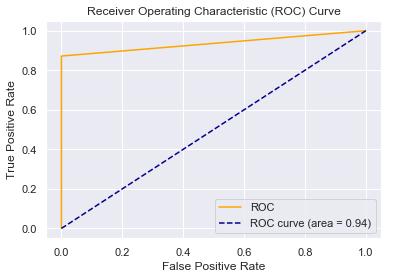

In [33]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()